In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.integrate as integrate

In [45]:
# b = 2, a =-4
a = -4.
b = 2.

In [46]:
def sample(n):
    X = []
    Y = []
    # Формируем однородную непрерывную случайную величину.
    random_variable = sts.uniform()
    # Генерируем случайные числа
    xi = random_variable.rvs(size=n)
    # X_i = e_i(b - a) + a
    for i in range(n):
        x = xi[i] * (b - a) + a
        X.append(x)
        if x < 0:
            y = - (abs(x))**(1/3)
        else:
            y = x**(1/3)
        Y.append(y)
    return Y

In [158]:
n = 20
Y = sample(n)
print(Y)

[0.5288629521657191, -1.5303073244696463, 1.1104523576219245, -0.9361128050420648, -0.8632882078484253, -1.2013203135872448, 1.2540121788715366, -1.1759089641631186, -0.6199448939400014, -1.3164519663979088, 0.6091185376293773, -1.052228284016513, -1.3314670127486672, -0.6289584930105324, 1.085233181182091, -1.58120718171662, -0.8744893218039929, -1.0302622034231175, -1.4711357952959772, 0.6499976722363383]


 1)Найдем точечную оценку математического ожидания случайной величины:

In [159]:
MO = sum(Y) / n
print("M = ", MO)

M =  -0.5187702943878422


 2)Найдем точечную оценку дисперсии случайной величины:

In [160]:
Disp = 0.
for i in Y:
    Disp += (i - MO) ** 2
Disp = Disp / (n - 1)
print("D = ", Disp)

D =  0.9656356914862025


3)Найдем доверительный интервал для оценки математического ожидания случайной величины для различных уровней значимости:

Уровни значимости $\gamma$ примем равными $0.9$, $0.95$, $0.99$

Получаем n-1=19 степеней свободы. Тогда из таблице имеем: $t_{0.9, 19}=1.73$, $t_{0.95, 19}=2.093$,  $t_{0.99, 19}=2.861$

In [161]:
t_g = [1.73, 2.093, 2.861]
intervals = []
for t in t_g:
    intervals.append((MO - np.sqrt(Disp) * t / np.sqrt(n - 1), MO + np.sqrt(Disp) * t / np.sqrt(n - 1)))
    
print(intervals)

[(-0.9087804873078853, -0.1287601014677991), (-0.9906149959957324, -0.04692559277995195), (-1.1637524689220868, 0.1262118801464025)]


4)Построим график зависимости величины доверительного интервала от уровня значимости

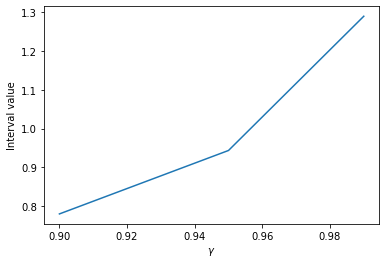

In [162]:
gamma = [0.9, 0.95, 0.99]
plt.plot(gamma, [interval[1] - interval[0] for interval in intervals])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

5)Найти теоретическое значение дисперсии случайной величины по известной плотности распределения

$$D[X] = M[X^2] - M^2[X] = \int_{-(4)^{(1/3)}}^{(2)^{(1/3)}} {(x^4)/2}dx - \big{(}\int_{-(4)^{(1/3)}}^{(2)^{(1/3)}} {(x^3)/2}dx\big{)}^2$$

In [163]:
M_teor = integrate.quad(lambda x: (x ** 3)/2, -(4)**(1/3), 2**(1/3))[0]
print("M_teor = ", M_teor)
Disp_teor = integrate.quad(lambda x: (x ** 4)/2, -(4)**(1/3), 2**(1/3))[0] - M_teor**2 
print("D_teor = ", Disp_teor)

M_teor =  -0.4787202635103814
D_teor =  1.0962439596140896


1.6. Найдем доверительный интервал для оценки математического ожидания случайной величины при известной дисперсии для различных уровней значимости:

In [164]:
intervals2 = []
t_lapl = [1.65, 1.92, 2.58]
for i in t_lapl:
    intervals2.append((MO - np.sqrt(Disp_teor) * i / np.sqrt(n), MO + np.sqrt(Disp_teor) * i / np.sqrt(n)))
print(intervals2)

[(-0.9050683774823198, -0.13247221129336456), (-0.968280791079598, -0.06925979769608637), (-1.122800024317389, 0.08525943554170468)]


1.7. Построить график зависимости величины доверительного интервала от уровня значимости:

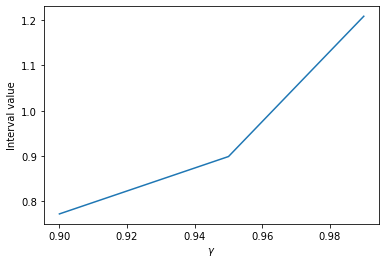

In [165]:
plt.plot(gamma, [interval[1] - interval[0] for interval in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

In [174]:
n = 70
M_teor = integrate.quad(lambda x: (x ** 3)/2, -(4)**(1/3), 2**(1/3))[0]
Disp_teor = integrate.quad(lambda x: (x ** 4)/2, -(4)**(1/3), 2**(1/3))[0] - M_teor**2 
diff = []
for k in range(1000):
    Y = sample(n)
    MO = sum(Y) / n
    Disp = 0.
    for i in Y:
        Disp += (i - MO) ** 2
    Disp = Disp / (n - 1)
    t_g = [1.73, 2.093, 2.861]
    intervals = []
    for t in t_g:
        intervals.append((MO - np.sqrt(Disp) * t / np.sqrt(n - 1), MO + np.sqrt(Disp) * t / np.sqrt(n - 1)))
    intervals2 = []
    t_lapl = [1.65, 1.92, 2.58]
    for i in t_lapl:
        intervals2.append((MO - np.sqrt(Disp_teor) * i / np.sqrt(n), MO + np.sqrt(Disp_teor) * i / np.sqrt(n)))
    diff.append((intervals[0][1]-intervals[0][0])-(intervals2[0][1]-intervals2[0][0]))
delta = sum(diff) / 1000
print(diff)
print("delta = ", delta)

[0.03196424898213568, 0.0403660787421149, 0.027564920577803242, 0.04324788591268519, 0.005319638067902199, 0.04051790006987793, 0.0764980039365648, 0.040140701075499885, 0.026215334852193517, 0.01993122443382006, 0.01831833924704296, 0.03974203564405743, 0.042891132526103715, -0.0068084090036750755, 0.02090705386253844, 0.011712023469373722, 0.02061155412429566, 0.011924812266564055, 0.02889113046341857, 0.026048995960734844, 0.03450678244300015, -0.001995050292908529, 0.008020569282658485, 0.04746735664534446, -0.02245079522893123, 0.01083709477329281, 0.01766990994760348, -0.028256076434850508, 0.017892359351551868, 0.0037055058196464596, 5.0471693113784966e-05, 0.05518675469691542, 0.04726575302930108, 0.0009904127661403694, 0.001952418256346622, 0.026042249581004207, 0.010631179897476528, 0.015773902573437804, 0.009399908371294119, 0.004503984508786862, -0.0021559635405212774, 0.02282692262949615, 0.04852299979563823, 0.0033541824819405264, 0.026941864126873494, 0.01539867085748247

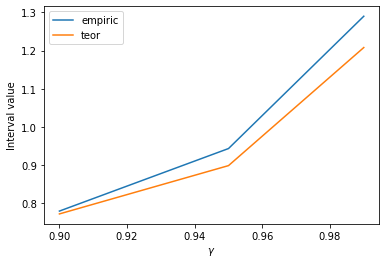

In [166]:
plt.plot(gamma, [interval[1] - interval[0] for interval in intervals], label = 'empiric')
plt.plot(gamma, [interval[1] - interval[0] for interval in intervals2], label = 'teor')
plt.legend()
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

1.9. Повторим п.п. 1.2 – 1.8. для различного объема выборки: n = 30, 50, 70, 100, 150.

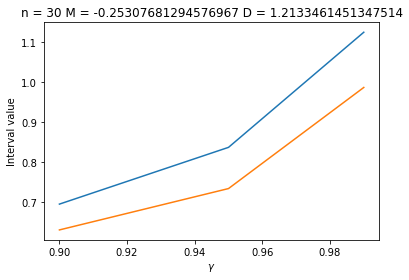

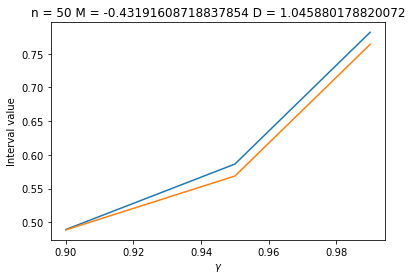

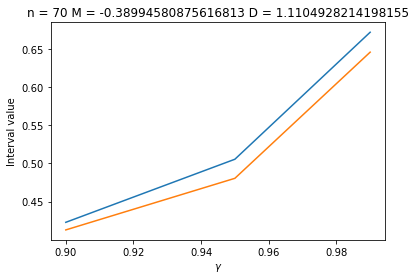

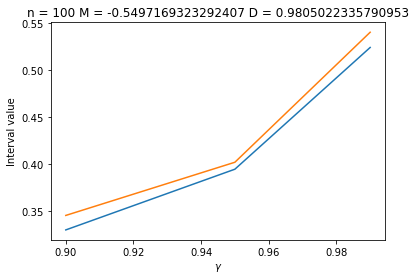

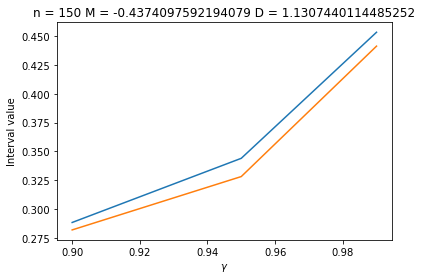

In [170]:
N = [30, 50, 70, 100, 150]
all_intervals = []
for n in N:
    Y = sample(n)
    MO = sum(Y) / n
    Disp = 0.
    for i in Y:
        Disp += (i - MO) ** 2
    Disp = Disp / (n - 1)

    t_rv = sts.t(n-1)
    arr = t_rv.rvs(1000000)
    t_g = []
    for i in gamma:
        tmp = sts.mstats.mquantiles(arr, prob=[1-(1-i)/2])
        t_g.append(tmp[0])
 
    intervals = []
    for t in t_g:
        intervals.append((MO - np.sqrt(Disp) * t / np.sqrt(n - 1), MO + np.sqrt(Disp) * t / np.sqrt(n - 1)))
    intervals2 = []
    t_lapl = [1.65, 1.92, 2.58]
    for i in t_lapl:
        intervals2.append((MO - np.sqrt(Disp_teor) * i / np.sqrt(n), MO + np.sqrt(Disp_teor) * i / np.sqrt(n)))
    all_intervals.append(intervals2)
    str = "n = " + n.__str__()+ " M = " + MO.__str__() + " D = " + Disp.__str__()
    plt.title(str)
    plt.plot(gamma, [interval[1] - interval[0] for interval in intervals])
    plt.plot(gamma, [interval[1] - interval[0] for interval in intervals2])
    plt.xlabel("$\gamma$")
    plt.ylabel("Interval value")
    plt.show()

10) Построим графики зависимости величины доверительного интервала от объема выборки

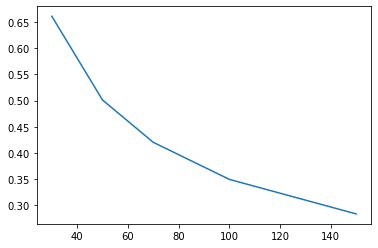

In [14]:
# для уровня 0.9
plt.plot(N, [(interv[0][1] - interv[0][0]) for interv in all_intervals])

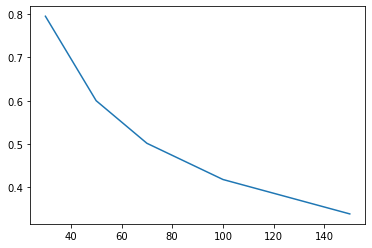

In [15]:
# для уровня 0.95
plt.plot(N, [(interv[1][1] - interv[1][0]) for interv in all_intervals])

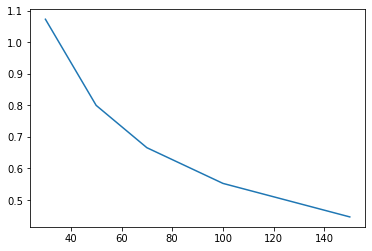

In [16]:
# для уровня 0.99
plt.plot(N, [(interv[2][1] - interv[2][0]) for interv in all_intervals])

Задание2

In [127]:
n = 20
Y = sample(n)
print(Y)

[-1.5499200841721699, 1.1274702990322196, -1.3995497010625282, -0.9259324345992421, -1.13303056137571, -1.4146983233471147, -1.4695301643909189, -0.6522935373724674, 1.236236931168583, 1.1433695238818247, 1.0521419563104215, 0.9849885029368921, -0.4686870866325653, 1.1128704550065833, 0.997237060160322, -1.0337216736296875, -1.347361253669971, 0.7281487178362869, 1.147463244532235, 0.9653444926294057]


1-2)Найдем точечную оценку математического ожидания и дисперсии случайной величины

In [128]:
MO = sum(Y) / n
print("M = ", MO)
Disp = 0.
for i in Y:
    Disp += (i - MO) ** 2
Disp = Disp / (n - 1)
print("D = ", Disp)

M =  -0.04497268183788006
D =  1.3340711707612485


3) Найдем доверительный интервал для оценки дисперсии случайной величины для различных уровней значимости

Уровни значимости $\gamma$ примем равными $0.9$, $0.95$, $0.99$

Получаем n-1=19 степеней свободы

$\chi^2_{\frac{1-\gamma}{2}, n-1}$ и $\chi^2_{\frac{1+\gamma}{2}, n-1}$: $\chi^2_{0.05, 19}=30.14353$ и $\chi^2_{0.95, 19}=10.11701, \chi^2_{0.025, 19}=32.85233$ и $\chi^2_{0.975, 19}=8.90652, \chi^2_{0.005, 19}=38.58226$ и $\chi^2_{0.995, 19}=6.84397$

In [129]:
xi_minus = [30.14353, 32.85233, 38.58226]
xi_plus = [10.11701, 8.90652, 6.84397]
intervals = []

for i in range(3):
    intervals.append(((n-1) * Disp / xi_minus[i], (n - 1) * Disp / xi_plus[i]))
print(intervals)

[(0.8408886498848583, 2.5054193130642077), (0.7715541711794481, 2.84593222094193), (0.6569690900549559, 3.7036036459048947)]


4) Построим график зависимости величины доверительного интервала от уровня значимости

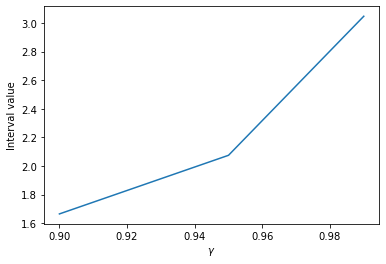

In [130]:
plt.plot(gamma, [interval[1] - interval[0] for interval in intervals])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

5) Найдем теоретическое значение математического ожидания случайной величины по известной плотности распределения

In [131]:
MO_teor = integrate.quad(lambda x: (x ** 3)/2, -(4)**(1/3), 2**(1/3))[0]
print("M = ", MO_teor)

M =  -0.4787202635103814


6) Найдем доверительный интервал для оценки дисперсии случайной величины при известном математическом ожидании для различных уровней значимости

In [132]:
Disp = 0.
for i in Y:
    Disp += (i - MO_teor) ** 2
Disp = Disp / n
print("D = ", Disp)

D =  1.5321100808736097


In [133]:
intervals2 = []
chi_mass2 = sts.chi2(n)
array2 = chi_mass.rvs(100000)
xi_plus2 = []
xi_minus2 = []
for i in gamma:
    temp = sts.mstats.mquantiles(array2, prob=[(1-i)/2, (1+i)/2])
    xi_plus2.append(temp[0])
    xi_minus2.append(temp[1])
for i in range(3):
    intervals2.append((n * Disp / xi_minus[i], n * Disp / xi_plus[i]))
print(intervals2)

[(1.016543238879859, 3.0287804022603706), (0.9327253688694893, 3.4404236017515473), (0.7942044249733478, 4.477255396717431)]


7. Построим график зависимости величины доверительного интервала от уровня значимости

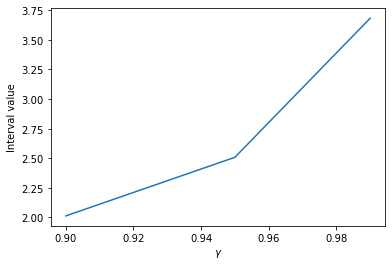

In [134]:
plt.plot(gamma, [interval[1] - interval[0] for interval in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

8) Сравним результаты, полученные по п.п. 4, 7

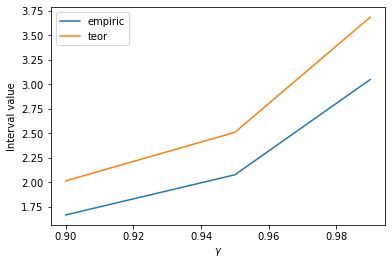

In [135]:
plt.plot(gamma, [interval[1] - interval[0] for interval in intervals], label = 'empiric')
plt.plot(gamma, [interval[1] - interval[0] for interval in intervals2], label = 'teor')
plt.legend()
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()


[(0.5961412919065386, 1.427204641699926), (0.5552302404168723, 1.5771305173040278), (0.48500725420024055, 1.9162875784196327)]


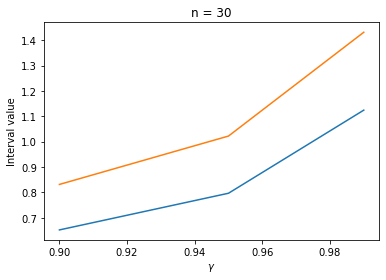

[(0.9510143641352011, 1.8624416260689978), (0.898854758804308, 2.005510183476252), (0.8051387662125981, 2.3285301445338904)]


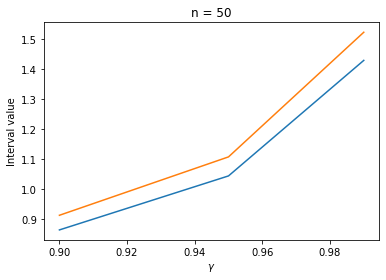

[(0.9608523739682195, 1.6892146650427078), (0.9145329802909967, 1.7942801441905403), (0.8351632238984722, 2.0253932269234283)]


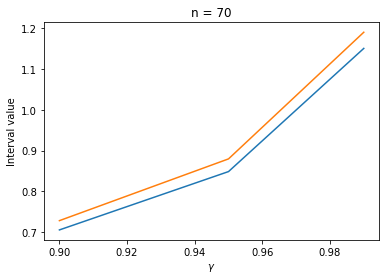

[(0.9248510586887122, 1.4791579849706473), (0.8869746135146377, 1.5553709516803307), (0.8201165252523569, 1.7103799368019617)]


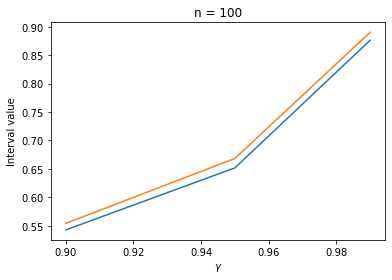

[(0.9087396726516372, 1.3315955587629515), (0.8778092504072382, 1.384470583435645), (0.8222831373369747, 1.4994310470482022)]


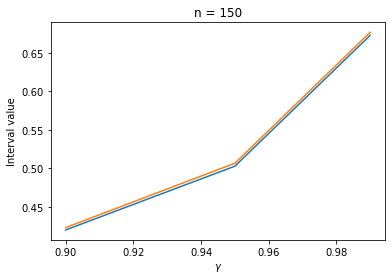

In [136]:
N = [30, 50, 70, 100, 150]
all_intervals = []
for n in N:
    Y = sample(n)
    MO = sum(Y) / n
    Disp = 0.
    for i in Y:
        Disp += (i - MO) ** 2
    Disp = Disp / (n - 1)
#     вычисляем хи
    chi_mass = sts.chi2(n - 1)
    array = chi_mass.rvs(100000)
    xi_plus = []
    xi_minus = []
    for i in gamma:
        temp = sts.mstats.mquantiles(array, prob=[(1-i)/2, (1+i)/2])
        xi_plus.append(temp[0])
        xi_minus.append(temp[1])
        
    intervals = []
    for i in range(3):
        intervals.append(((n-1) * Disp / xi_minus[i], (n - 1) * Disp / xi_plus[i]))
    Disp2 = 0.
    for i in Y:
        Disp2 += (i - MO_teor) ** 2
    Disp2 = Disp2 / (n - 1)
    intervals2 = []
    chi_mass2 = sts.chi2(n)
    array2 = chi_mass.rvs(100000)
    xi_plus2 = []
    xi_minus2 = []
    for i in gamma:
        temp = sts.mstats.mquantiles(array2, prob=[(1-i)/2, (1+i)/2])
        xi_plus2.append(temp[0])
        xi_minus2.append(temp[1])
    for i in range(3):
        intervals2.append((n * Disp2 / xi_minus2[i], n * Disp2 / xi_plus2[i]))
    all_intervals.append(intervals2)
    print(intervals2)
    str = "n = " + n.__str__()
    plt.title(str)
    plt.plot(gamma, [interval[1] - interval[0] for interval in intervals])
    plt.plot(gamma, [interval[1] - interval[0] for interval in intervals2])
    plt.xlabel("$\gamma$")
    plt.ylabel("Interval value")
    plt.show()

10) Построим графики зависимости величины доверительного интервала от объема выборки

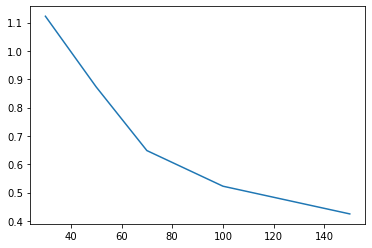

In [96]:
# для уровня 0.9
plt.plot(N, [(interv[0][1] - interv[0][0]) for interv in all_intervals])

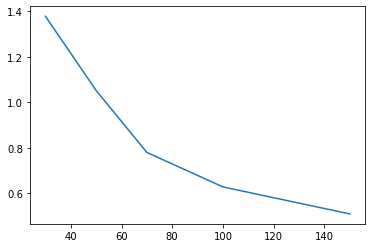

In [97]:
# для уровня 0.95
plt.plot(N, [(interv[1][1] - interv[1][0]) for interv in all_intervals])

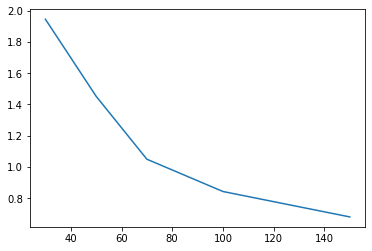

In [98]:
# для уровня 0.99
plt.plot(N, [(interv[2][1] - interv[2][0]) for interv in all_intervals])